In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

In [2]:
#create engine using the 'hawaii sqlite DB
engine = create_engine("sqlite:///hawaii.sqlite")


In [3]:
#declare a base using the Automap_base 
Base = automap_base()

In [4]:
#use base class to reflect the databases tables
Base.prepare(engine, reflect=True)

In [6]:
#show all of classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
#Assign the both measurement and station classes to a variable with their names
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
session = Session(engine)

# Querying the data with sql alchemy 

In [25]:
#set query to variable that will be used to create data frame
dt_prcp=session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date > '2017-01-20').all()

In [26]:
#create data frame off of sql query from previous line
dt_prcp_df = pd.DataFrame(dt_prcp)

In [31]:
#set index on the date column
dt_prcp_df.set_index('date')
dt_prcp_df.head()

,date,prcp
0,2017-01-21,0.00
1,2017-01-22,0.16
2,2017-01-23,0.00
3,2017-01-24,0.04
4,2017-01-25,0.03


In [36]:
plt.plot(dt_prcp_df['date'],dt_prcp_df['prcp'])
plt.grid(True)

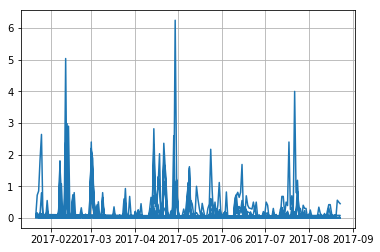

In [37]:
plt.show()